In [31]:
ls

converted_train.csv     metastore_db/           test_converted.csv
data-cleaning.ipynb     ml_first.attempt.ipynb
derby.log               test_converted


In [32]:
ls ../

macro.csv              test.csv               work-space/
sample_submission.csv  train.csv


In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
train = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")

In [35]:
print(train.shape)
train.head()

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [36]:
print(test.shape)
test.head()

(7662, 291)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [37]:
len(np.unique(train['id']))

30471

In [38]:
len(np.unique(train['num_room']) )

9585

In [39]:
train = train.set_index('timestamp')
test = test.set_index("timestamp")
train.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-20,1,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2011-08-23,2,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2011-08-27,3,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
2011-09-01,4,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
2011-09-05,5,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [40]:
train.drop("id", axis=1, inplace=True)

In [41]:
train.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,9,4,0,13,22,1,0,52,4,5850000
2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,15,3,0,15,29,1,10,66,14,6000000
2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,10,3,0,11,27,0,4,67,10,5700000
2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,11,2,1,4,4,0,0,26,3,13100000
2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,319,108,17,135,236,2,91,195,14,16331452


In [42]:
train.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [43]:
train.shape[0]

30471

In [44]:
train['price_doc'].values

array([ 5850000,  6000000,  5700000, ...,  6970959, 13500000,  5600000])

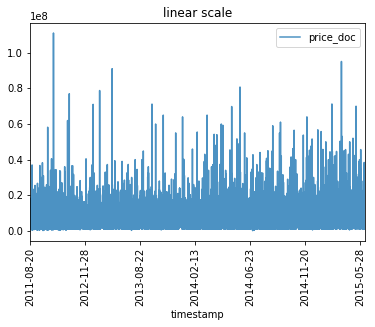

In [45]:
ax = train['price_doc'].plot(style=['-'])
ax.lines[0].set_alpha(0.8)
plt.xticks(rotation=90)
plt.title("linear scale")
ax.legend()

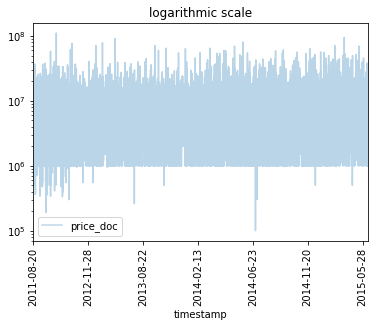

In [46]:
ax = train['price_doc'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

In [47]:
# no missing value for the target value
train[train['price_doc'].isnull()]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
timestamp,,,,,,,,,,,,,,,,,,,,,


In [48]:
train.columns[train.isnull().any()]

Index(['life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room',
       'kitch_sq', 'state', 'preschool_quota', 'school_quota',
       'hospital_beds_raion', 'raion_build_count_with_material_info',
       'build_count_block', 'build_count_wood', 'build_count_frame',
       'build_count_brick', 'build_count_monolith', 'build_count_panel',
       'build_count_foam', 'build_count_slag', 'build_count_mix',
       'raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_1921-1945', 'build_count_1946-1970',
       'build_count_1971-1995', 'build_count_after_1995', 'metro_min_walk',
       'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'ID_railroad_station_walk',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg',
       'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000',
       'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',


In [49]:
train2 = train.fillna(train.median())

In [50]:
train2.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,9,4,0,13,22,1,0,52,4,5850000
2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,15,3,0,15,29,1,10,66,14,6000000
2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,10,3,0,11,27,0,4,67,10,5700000
2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,11,2,1,4,4,0,0,26,3,13100000
2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,319,108,17,135,236,2,91,195,14,16331452


In [51]:
train2.columns[train2.isnull().any()]

Index([], dtype='object')

In [52]:
train2.corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
full_sq,1.000000,0.151406,0.089085,0.057650,0.017168,-0.002632,0.333761,0.009695,-0.039139,0.056303,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.341840
life_sq,0.151406,1.000000,0.032337,0.033413,0.014049,-0.002229,0.170746,0.003408,-0.048718,0.030447,...,0.025541,0.027358,0.030087,0.017044,0.017445,0.012040,0.020501,-0.001908,-0.030731,0.155199
floor,0.089085,0.032337,1.000000,0.371492,-0.019545,0.000363,-0.002176,-0.007286,-0.088592,-0.019617,...,-0.034639,-0.029525,-0.022250,-0.044165,-0.045394,-0.012376,-0.044033,-0.101506,-0.123279,0.117499
max_floor,0.057650,0.033413,0.371492,1.000000,0.057608,-0.000203,-0.016924,0.020689,-0.057017,-0.079706,...,-0.033110,-0.027566,-0.024109,-0.039856,-0.039812,-0.050576,-0.040000,-0.083046,-0.094422,0.085023
material,0.017168,0.014049,-0.019545,0.057608,1.000000,-0.002478,-0.043346,0.039342,-0.007639,-0.000326,...,0.046076,0.040506,0.040981,0.035807,0.040739,0.024321,0.041775,0.082950,0.063879,0.083699
build_year,-0.002632,-0.002229,0.000363,-0.000203,-0.002478,1.000000,-0.007519,0.000771,0.269990,-0.003693,...,0.001114,-0.000555,0.000240,-0.000949,0.000140,0.014792,-0.000441,0.004980,0.006213,0.002334
num_room,0.333761,0.170746,-0.002176,-0.016924,-0.043346,-0.007519,1.000000,0.016451,0.072853,-0.034652,...,0.053382,0.047305,0.048002,0.050233,0.053839,0.054956,0.048117,0.074481,0.051024,0.397644
kitch_sq,0.009695,0.003408,-0.007286,0.020689,0.039342,0.000771,0.016451,1.000000,0.051529,-0.020091,...,-0.005566,-0.006852,-0.007641,-0.003241,-0.002955,0.010504,-0.005111,0.014257,0.022195,0.025238
state,-0.039139,-0.048718,-0.088592,-0.057017,-0.007639,0.269990,0.072853,0.051529,1.000000,-0.213223,...,-0.000773,-0.014840,-0.021892,0.015330,0.020576,0.066670,0.000261,0.151604,0.214252,0.103395
area_m,0.056303,0.030447,-0.019617,-0.079706,-0.000326,-0.003693,-0.034652,-0.020091,-0.213223,1.000000,...,-0.192790,-0.157746,-0.154524,-0.221767,-0.210326,-0.086786,-0.195067,-0.416222,-0.449849,-0.166981


In [53]:
categorical = []
for i in train2.columns:
    if type(train2[i].values[0]) == str:
        categorical.append(i)
print(categorical)
print(len(categorical))

['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology']
15


In [54]:
train2.shape

(30471, 290)

In [55]:
train2[categorical].head()

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
timestamp,,,,,,,,,,,,,,,
2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent


In [56]:
np.unique(train2['product_type'])

array(['Investment', 'OwnerOccupier'], dtype=object)

In [57]:
for cat in categorical:
    print(cat, ':', np.unique(train2[cat]))

product_type : ['Investment' 'OwnerOccupier']
sub_area : ['Ajeroport' 'Akademicheskoe' 'Alekseevskoe' "Altuf'evskoe" 'Arbat'
 'Babushkinskoe' 'Basmannoe' 'Begovoe' 'Beskudnikovskoe' 'Bibirevo'
 'Birjulevo Vostochnoe' 'Birjulevo Zapadnoe' 'Bogorodskoe' 'Brateevo'
 'Butyrskoe' 'Caricyno' 'Cheremushki' "Chertanovo Central'noe"
 'Chertanovo Juzhnoe' 'Chertanovo Severnoe' 'Danilovskoe' 'Dmitrovskoe'
 'Donskoe' 'Dorogomilovo' 'Filevskij Park' 'Fili Davydkovo' 'Gagarinskoe'
 "Gol'janovo" 'Golovinskoe' 'Hamovniki' 'Horoshevo-Mnevniki' 'Horoshevskoe'
 'Hovrino' 'Ivanovskoe' 'Izmajlovo' 'Jakimanka' 'Jaroslavskoe' 'Jasenevo'
 'Juzhnoe Butovo' 'Juzhnoe Medvedkovo' 'Juzhnoe Tushino' 'Juzhnoportovoe'
 'Kapotnja' "Kon'kovo" 'Koptevo' 'Kosino-Uhtomskoe' 'Kotlovka'
 "Krasnosel'skoe" 'Krjukovo' 'Krylatskoe' 'Kuncevo' 'Kurkino' "Kuz'minki"
 'Lefortovo' 'Levoberezhnoe' 'Lianozovo' 'Ljublino' 'Lomonosovskoe'
 'Losinoostrovskoe' "Mar'ina Roshha" "Mar'ino" 'Marfino' 'Matushkino'
 'Meshhanskoe' 'Metrogorodok'

In [58]:
yes_no_mapping = {'no': 0, 'yes': 1}

In [59]:
# ordinal features which could be rendered as 0 and 1,
# each corresponding to 'no' and 'yes'
categorical[2:-1]

['culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line']

In [60]:
for i in categorical[2:-1]:
    train2[i] = train2[i].map(yes_no_mapping)

In [61]:
categorical = []
for i in train2.columns:
    if type(train2[i].values[0]) == str:
        categorical.append(i)
print(categorical)
print(len(categorical))

['product_type', 'sub_area', 'ecology']
3


In [62]:
np.unique(train2['ecology'].values)

array(['excellent', 'good', 'no data', 'poor', 'satisfactory'], dtype=object)

In [63]:
rate_mapping = {'excellent': 3, 'good': 2, 'satisfactory': 2, 'poor': 1, 'no data': np.nan} 

In [64]:
train2['ecology'] = train2['ecology'].map(rate_mapping)

In [65]:
print(len(train2[train2['ecology'].isnull()]))

7656


In [66]:
print(len(train2[train2['ecology'].notnull()]))

22815


In [67]:
print(train2.shape[0])

30471


In [68]:
print(len(train2[train2['ecology'].isnull()]) + len(train2[train2['ecology'].notnull()]))

30471


In [69]:
train2 = train2.fillna(train2.median())

In [70]:
print(len(train2[train2['ecology'].isnull()]))

0


In [71]:
train2.corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
full_sq,1.000000,0.151406,0.089085,0.057650,0.017168,-0.002632,0.333761,0.009695,-0.039139,0.056303,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.341840
life_sq,0.151406,1.000000,0.032337,0.033413,0.014049,-0.002229,0.170746,0.003408,-0.048718,0.030447,...,0.025541,0.027358,0.030087,0.017044,0.017445,0.012040,0.020501,-0.001908,-0.030731,0.155199
floor,0.089085,0.032337,1.000000,0.371492,-0.019545,0.000363,-0.002176,-0.007286,-0.088592,-0.019617,...,-0.034639,-0.029525,-0.022250,-0.044165,-0.045394,-0.012376,-0.044033,-0.101506,-0.123279,0.117499
max_floor,0.057650,0.033413,0.371492,1.000000,0.057608,-0.000203,-0.016924,0.020689,-0.057017,-0.079706,...,-0.033110,-0.027566,-0.024109,-0.039856,-0.039812,-0.050576,-0.040000,-0.083046,-0.094422,0.085023
material,0.017168,0.014049,-0.019545,0.057608,1.000000,-0.002478,-0.043346,0.039342,-0.007639,-0.000326,...,0.046076,0.040506,0.040981,0.035807,0.040739,0.024321,0.041775,0.082950,0.063879,0.083699
build_year,-0.002632,-0.002229,0.000363,-0.000203,-0.002478,1.000000,-0.007519,0.000771,0.269990,-0.003693,...,0.001114,-0.000555,0.000240,-0.000949,0.000140,0.014792,-0.000441,0.004980,0.006213,0.002334
num_room,0.333761,0.170746,-0.002176,-0.016924,-0.043346,-0.007519,1.000000,0.016451,0.072853,-0.034652,...,0.053382,0.047305,0.048002,0.050233,0.053839,0.054956,0.048117,0.074481,0.051024,0.397644
kitch_sq,0.009695,0.003408,-0.007286,0.020689,0.039342,0.000771,0.016451,1.000000,0.051529,-0.020091,...,-0.005566,-0.006852,-0.007641,-0.003241,-0.002955,0.010504,-0.005111,0.014257,0.022195,0.025238
state,-0.039139,-0.048718,-0.088592,-0.057017,-0.007639,0.269990,0.072853,0.051529,1.000000,-0.213223,...,-0.000773,-0.014840,-0.021892,0.015330,0.020576,0.066670,0.000261,0.151604,0.214252,0.103395
area_m,0.056303,0.030447,-0.019617,-0.079706,-0.000326,-0.003693,-0.034652,-0.020091,-0.213223,1.000000,...,-0.192790,-0.157746,-0.154524,-0.221767,-0.210326,-0.086786,-0.195067,-0.416222,-0.449849,-0.166981


In [72]:
ls

converted_train.csv     metastore_db/           test_converted.csv
data-cleaning.ipynb     ml_first.attempt.ipynb
derby.log               test_converted


In [73]:
train2.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,9,4,0,13,22,1,0,52,4,5850000
2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,15,3,0,15,29,1,10,66,14,6000000
2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,10,3,0,11,27,0,4,67,10,5700000
2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,11,2,1,4,4,0,0,26,3,13100000
2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,319,108,17,135,236,2,91,195,14,16331452


In [74]:
ls ../

macro.csv              test.csv               work-space/
sample_submission.csv  train.csv


In [75]:
train2.to_csv("converted_train.csv")

In [76]:
data = pd.read_csv("converted_train.csv")

In [77]:
data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,319,108,17,135,236,2,91,195,14,16331452


In [78]:
train2.head() 

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,9,4,0,13,22,1,0,52,4,5850000
2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,15,3,0,15,29,1,10,66,14,6000000
2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,10,3,0,11,27,0,4,67,10,5700000
2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,11,2,1,4,4,0,0,26,3,13100000
2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,...,319,108,17,135,236,2,91,195,14,16331452


In [79]:
ls ../

macro.csv              test.csv               work-space/
sample_submission.csv  train.csv


# Modify test data

In [80]:
test = pd.read_csv("../test.csv")

In [81]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [82]:
test = test.set_index('timestamp')
test.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-07-01,30474,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,...,8,0,0,0,1,10,1,0,14,1
2015-07-01,30475,79.2,NaN,8,17,1,0.0,3,1.0,1.0,...,4,1,1,0,2,11,0,1,12,1
2015-07-01,30476,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,...,42,11,4,0,10,21,0,10,71,11
2015-07-01,30477,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,...,1,1,2,0,0,10,0,0,2,0
2015-07-01,30478,40.0,40.0,17,17,1,0.0,1,1.0,1.0,...,5,1,1,0,2,12,0,1,11,1


In [83]:
test.drop("id", axis=1, inplace=True)
print(test.shape)

(7662, 289)


In [84]:
for i in test.columns:
    if i not in train.columns:
        print(i)

In [85]:
categorical = []
for i in test.columns:
    if type(test[i].values[0]) == str:
        categorical.append(i)
print(categorical)
print(len(categorical))

['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology']
15


In [86]:
categorical[2:-1]

['culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line']

In [87]:
for i in categorical[2:-1]:
    test[i] = test[i].map(yes_no_mapping)

In [88]:
test['ecology'] = test['ecology'].map(rate_mapping)

In [89]:
len(test[test['ecology'].isnull()])

1765

In [90]:
test = test.fillna(test.median())

In [91]:
test.columns[test.isnull().any()]

Index(['product_type'], dtype='object')

In [92]:
# there are 33 missing values in a column called 'producty_type'
len(test[test['product_type'].isnull()])

33

In [93]:
test.to_csv("test_converted.csv")

In [94]:
test2 = pd.read_csv("test_converted.csv")

In [95]:
test2.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,...,8,0,0,0,1,10,1,0,14,1
1,2015-07-01,79.2,30.4,8,17,1,0.0,3,1.0,1.0,...,4,1,1,0,2,11,0,1,12,1
2,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,...,42,11,4,0,10,21,0,10,71,11
3,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,...,1,1,2,0,0,10,0,0,2,0
4,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,...,5,1,1,0,2,12,0,1,11,1


In [96]:
ls

converted_train.csv     metastore_db/           test_converted.csv
data-cleaning.ipynb     ml_first.attempt.ipynb
derby.log               test_converted


In [97]:
train2 = pd.read_csv("converted_train.csv")

In [98]:
train2.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,319,108,17,135,236,2,91,195,14,16331452
